In [1]:
# Import Libararies
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
# Knn Imputer
from sklearn.impute import KNNImputer
# standard scalar and MinMaxScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler
# Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Clasifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
#pipeline
from sklearn.pipeline import Pipeline
#Train Test split
from sklearn.model_selection import train_test_split
# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# for NLP
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import string
from bs4 import BeautifulSoup
# For Reduce Imbalancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# TfidfVectorizer

# Count Vectorizer 
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer

From [this notebook](https://www.kaggle.com/code/marianadeem755/amazon-s-topbooks-reviews-tfidfvec-countvec).

In [2]:
df=pd.read_csv("data/Top-100 Trending Books.csv")
df.head()

,Rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...
2,3,My Name Is Barbra,31.50,4.5,Barbra Streisand,2023,Autobiography,amazon.com/My-Name-Barbra-Streisand/dp/0525429...
3,4,"Friends, Lovers, and the Big Terrible Thing: A...",23.99,4.4,Matthew Perry,2023,Memoir,amazon.com/Friends-Lovers-Big-Terrible-Thing/d...
4,5,How to Catch a Turkey,5.65,4.8,Adam Wallace,2018,"Childrens, Fiction",amazon.com/How-Catch-Turkey-Adam-Wallace/dp/14...


In [3]:
df1=pd.read_csv('data/customer reviews.csv')
df1.head()

,Sno,book name,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,0,The Woman in Me,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,26-10-2023,"Reviewed in the United States October 26, 2023",1668009048
1,1,The Woman in Me,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,06-11-2023,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048
3,3,The Woman in Me,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,25-10-2023,"Reviewed in the United States October 25, 2023",1668009048
4,4,The Woman in Me,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,01-11-2023,"Reviewed in the United States November 1, 2023",1668009048


In [4]:
# Guardiamo le colonne
df.columns

Index(['Rank', 'book title', 'book price', 'rating', 'author',
       'year of publication', 'genre', 'url'],
      dtype='object')

In [5]:
df1.columns

Index(['Sno', 'book name', 'review title', 'reviewer', 'reviewer rating',
       'review description', 'is_verified', 'date', 'timestamp', 'ASIN'],
      dtype='object')

In [6]:
# ora guardiamo un po' alla struttura del database
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 100 non-null    int64  
 1   book title           100 non-null    object 
 2   book price           100 non-null    float64
 3   rating               97 non-null     float64
 4   author               100 non-null    object 
 5   year of publication  100 non-null    int64  
 6   genre                100 non-null    object 
 7   url                  100 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


Come si vede, il primo file è composto di 100 righe, i primi 100 libri Besteller in Amazon a Novembre 2023. È composto da 8 colonne, dove 4 di esse sono di tipo object, ossia stringhe, 2 sono di tipo int64, come il rank e l'anno, ed altre 2 di tipo float, come il prezzo ed il rating. 

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Sno                 920 non-null    int64 
 1   book name           920 non-null    object
 2   review title        920 non-null    object
 3   reviewer            920 non-null    object
 4   reviewer rating     920 non-null    int64 
 5   review description  920 non-null    object
 6   is_verified         920 non-null    bool  
 7   date                920 non-null    object
 8   timestamp           920 non-null    object
 9   ASIN                920 non-null    object
dtypes: bool(1), int64(2), object(7)
memory usage: 65.7+ KB


Questo secondo file è composto 7 colonne stringa, una colonna bool, una colonna datetime (date, da convertire), 2 di tipo int64.

Osserviamo adesso le summary statistics.

In [8]:
df.describe()

,Rank,book price,rating,year of publication
count,100.000000,100.000000,97.000000,100.00000
mean,50.500000,12.708600,4.689691,2013.76000
std,29.011492,7.915568,0.181133,15.13049
min,1.000000,2.780000,4.100000,1947.00000
25%,25.750000,6.302500,4.600000,2014.00000
50%,50.500000,11.480000,4.700000,2019.00000
75%,75.250000,16.990000,4.800000,2023.00000
max,100.000000,48.770000,5.000000,2024.00000


In [9]:
df1.describe()


,Sno,reviewer rating
count,920.000000,920.000000
mean,459.500000,4.826087
std,265.725422,0.432839
min,0.000000,2.000000
25%,229.750000,5.000000
50%,459.500000,5.000000
75%,689.250000,5.000000
max,919.000000,5.000000


In [10]:
# facciamo in modo che il numero di righe e di colonne che andiamo a stampare, con Pandas, non sia limitato. Quindi non ci saranno troncamenti quando andremo a stampare i DataFrame. 
# questo può essere utile con grandi dataset per vedere tutte le colonne.
# Lo facciamo qui perché abbiamo 100 righe. In altri casi, potrebbe essere inadatto. 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df['Rank'].describe()

count    100.000000
mean      50.500000
std       29.011492
min        1.000000
25%       25.750000
50%       50.500000
75%       75.250000
max      100.000000
Name: Rank, dtype: float64

## Stacked bar plot

Questo codice utilizza la libreria pandas per ordinare un DataFrame in base alla colonna "Rank", quindi crea un grafico a barre utilizzando matplotlib per visualizzare i valori ordinati. Ecco cosa fa passo dopo passo:

1. Importa le librerie pandas e matplotlib.pyplot.

2. Ordina il DataFrame df in base alla colonna 'Rank' e memorizza il risultato in df_sorted.

3. Crea una lista di altezze (heights) utilizzando i valori della colonna 'Rank' del DataFrame ordinato. Inoltre, il codice inverte l'ordine delle altezze in modo che il rango più alto sia visualizzato nella parte superiore del grafico.

4. Crea una lista di nomi di autori (x) utilizzando i valori della colonna 'author' del DataFrame ordinato. Se la lunghezza di un nome supera una certa lunghezza massima (max_name_length), il nome viene troncato e sostituito con "..." alla fine.

5. Definisce uno schema di colori per le barre del grafico.

6. Imposta le dimensioni della figura del grafico utilizzando plt.figure(figsize=(35, 20)).

7. Aggiunge un colore di sfondo al grafico utilizzando plt.axhspan().

8. Crea le barre del grafico utilizzando plt.bar(), specificando i nomi degli autori troncati come etichette sull'asse x e le altezze come altezza delle barre.

9. Annota i valori di rango all'interno delle barre utilizzando plt.text().

10. Personalizza vari elementi del grafico, come titolo, etichette degli assi, dimensioni del testo e stile del testo.

11. Rimuove le linee della griglia utilizzando plt.grid(False).

12. Chiude il layout del grafico e lo visualizza utilizzando plt.tight_layout() e plt.show().

In sintesi, questo codice crea un grafico a barre che visualizza i ranghi delle opere letterarie per autore, con il rango più alto visualizzato nella parte superiore del grafico.

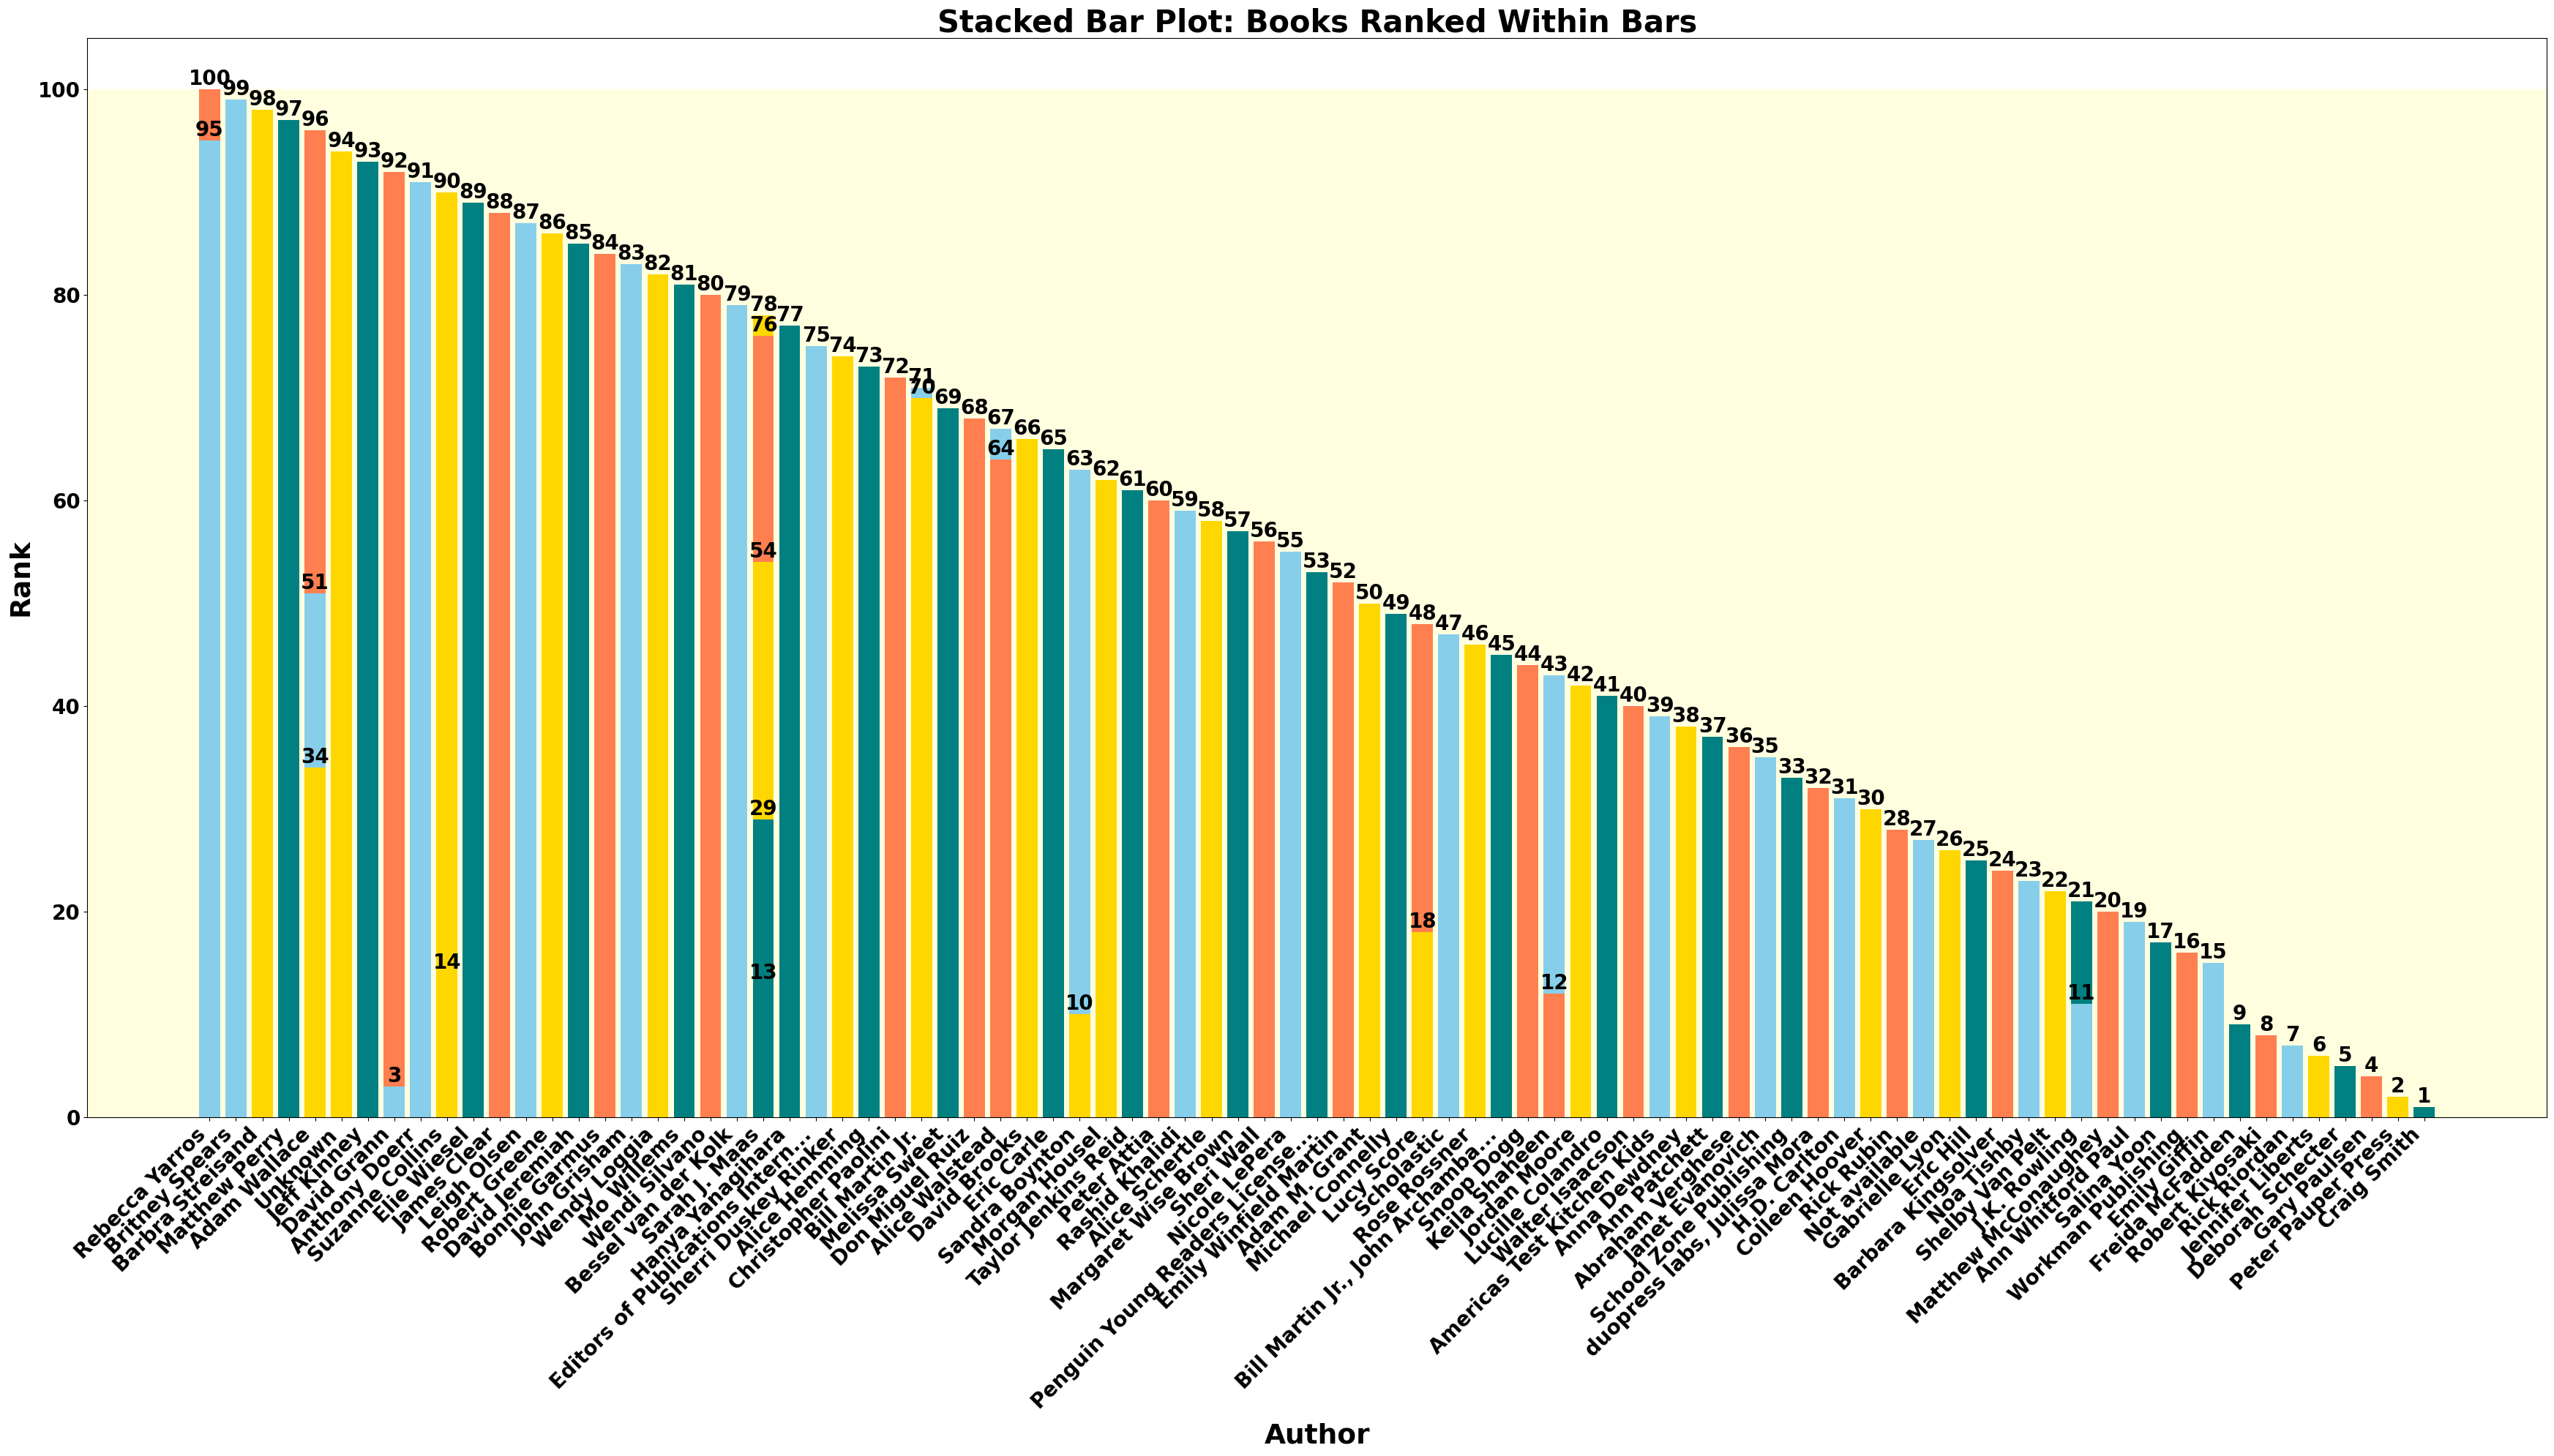

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Lets sort the values based on the Rank column
df_sorted = df.sort_values('Rank')

# Create new heights based on rank (higher rank, higher value)
heights = df_sorted['Rank'].iloc[::-1]  # Reverse order (highest rank on top)
x = df_sorted['author']

# Truncate author names (optional, adjust truncation length as needed)
max_name_length = 30  # Adjust this value based on your preference
truncated_names = [name[:max_name_length] + "..." if len(name) > max_name_length else name for name in x]

# Define a color scheme
colors = ['coral', 'skyblue', 'gold', 'teal']

plt.figure(figsize=(35, 20))  # Adjust figure size as needed

# Add background color
background_color = 'lightyellow' # Specify the background color
plt.axhspan(0, max(heights), facecolor=background_color)

bars = plt.bar(truncated_names, heights, color=colors)

# Annotate rank values within bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom',
             fontsize=20, fontweight='bold')

# Customize plot elements for clarity and bold ticks
plt.title("Stacked Bar Plot: Books Ranked Within Bars", fontsize=30, fontweight='bold')
plt.xlabel("Author", fontsize=27, fontweight='bold')
plt.ylabel("Rank", fontsize=27, fontweight='bold')

# Rotate x-axis labels for readability and make them bold
plt.xticks(rotation=45, ha='right', fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

# Remove grid lines
plt.grid(False)

plt.tight_layout()
plt.show()

Abbiamo rappresentato gli autori in ordine in base alla loro posizione nel ranking. Alcuni autori appaiono più volte nel ranking, ed hanno una sola colonna nel grafico. 

Ora esploriamo la colonna "titolo". Notiamo che un titolo compare due volte, magari avrà due edizioni diverse.

In [13]:
value_counts=df['book title'].value_counts()
value_counts.head(10)

book title
The Ballad of Songbirds and Snakes (A Hunger Games Novel) (The Hunger Games)                                                     2
The Creative Act: A Way of Being                                                                                                 1
A Court of Mist and Fury (A Court of Thorns and Roses, 2)                                                                        1
Verity                                                                                                                           1
Haunting Adeline (Cat and Mouse Duet)                                                                                            1
Hello, Baby Animals: A Durable High-Contrast Black-and-White Board Book for Newborns and Babies (High-Contrast Books)            1
School Zone - Multiplication 0-12 Flash Cards - Ages 8+, 3rd Grade, 4th Grade, Elementary Math, Multiplication Facts, Common     1
How to Catch an Elf                                                     

In [14]:
# Highest ranked book
highest_ranked_title = df.iloc[0]['book title']  # Access first row, 'book title' column

# Lowest ranked book
lowest_ranked_title = df.iloc[-1]['book title']  # Access last row, 'book title' column

# Calculate the number of rows
num_rows = len(df)

# Check if there's an even number of rows for a true middle rank
if num_rows % 2 == 0:
  # Midpoint for even rows (average of middle two)
  mid_rank_index = int(num_rows / 2) - 1  # Subtract 1 to get correct index
  mid_ranked_title1 = df.iloc[mid_rank_index]['book title']
  mid_ranked_title2 = df.iloc[mid_rank_index + 1]['book title']
  mid_ranked_title = f"{mid_ranked_title1} & {mid_ranked_title2}"  # Combine titles with '&'
else:
  # True middle rank for odd rows
  mid_rank_index = int(num_rows / 2)
  mid_ranked_title = df.iloc[mid_rank_index]['book title']

# Print results
print(f"Highest Ranked: {highest_ranked_title}")
print(f"Lowest Ranked: {lowest_ranked_title}")
print(f"Mid Ranked: {mid_ranked_title}")

Highest Ranked: Iron Flame (The Empyrean, 2)
Lowest Ranked: The Wonky Donkey
Mid Ranked: How to Catch a Dinosaur & Hidden Potential: The Science of Achieving Greater Things


Costruiamoci una word cloud usando i titoli dei libri. Questo ci permette di avere una overview veloce ed immediata di quelli che potrebbero essere gli argomenti dei libri.

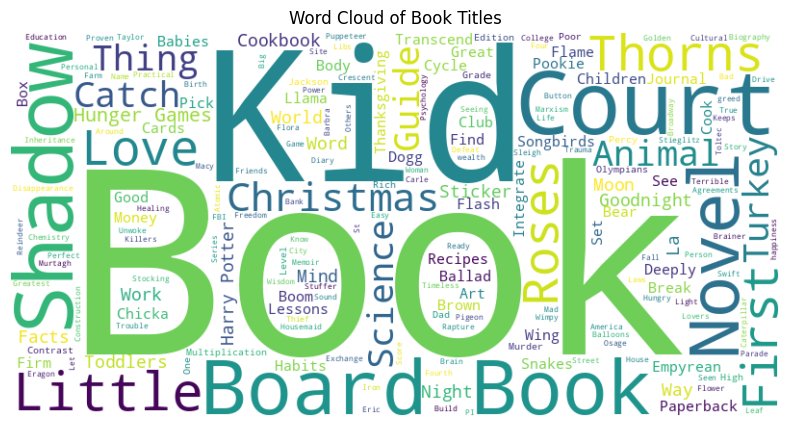

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with the given columns

# Word Cloud
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['book title']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Book Titles')
plt.show()

In [16]:
author_books_count=df['author'].value_counts()
author_books_count.head()

author
Sarah J. Maas      5
Adam Wallace       3
Lucy Score         2
Bill Martin Jr.    2
Rebecca Yarros     2
Name: count, dtype: int64

Vediamo come alcuni autori nella top 100 abbiano scritto più di un libro. In totale vi sono 85 valori unici

In [17]:
df['author'].unique().size

85

Esploriamo ora il rating e l'anno di pubblicazione dei libri.

In [18]:
df['rating'].describe()

count    97.000000
mean      4.689691
std       0.181133
min       4.100000
25%       4.600000
50%       4.700000
75%       4.800000
max       5.000000
Name: rating, dtype: float64

In [19]:
df['year of publication'].describe()

count     100.00000
mean     2013.76000
std        15.13049
min      1947.00000
25%      2014.00000
50%      2019.00000
75%      2023.00000
max      2024.00000
Name: year of publication, dtype: float64

In [20]:
import pandas as pd

df['year of publication'] = pd.to_datetime(df['year of publication'], format='%Y')
start_date = df['year of publication'].min()
end_date = df['year of publication'].max()

num_years = end_date.year - start_date.year + 1

# Print the results
print("In this dataset The starting year of book publication is:", start_date.year)
print("In this dataset The last year of book publication is:", end_date.year)
print("Number of years present in the dataset:", num_years)

In this dataset The starting year of book publication is: 1947
In this dataset The last year of book publication is: 2024
Number of years present in the dataset: 78


Come si nota, non tutti i libri sono recenti. Il più vecchio risale al 1947!

Visualizziamo ora l'anno di pubblicazione dei libri assieme ai loro ratings e agli autori.

In [21]:
import plotly.express as px
fig=px.bar(df, x='year of publication', y='rating', color='author')
fig.show()

In [22]:
df['genre'].unique().size

79

In [23]:
df['genre'].value_counts().head()

genre
Nonfiction               6
Childrens, literature    5
Childrens                4
Memoir                   3
Fantasy                  3
Name: count, dtype: int64

In [24]:
genre_counts = df['genre'].value_counts()
most_popular_genre = genre_counts.idxmax()

print("Most popular genre:", most_popular_genre)

# Retrieve the plot for the most popular genre
most_popular_genre_books = df[df['genre'] == most_popular_genre]
most_popular_genre_book_title = most_popular_genre_books['book title'].iloc[0]  # Assuming 'book title' contains the plot

print("Book Title for the most popular genre:", most_popular_genre_book_title)

Most popular genre: Nonfiction
Book Title for the most popular genre: The 48 Laws of Power


Creiamo una treemap che compara i generi in base al loro rating (rating più alto portano un colore di heat più alto)

In [25]:
fig = px.treemap(df, path=['genre'], values='rating', color='Rank', labels='genre',
                width=1200, height=700)

# No need to specify textinfo as it defaults to 'label+value'
fig.update_layout(title="Treemap of Ratings by Genre",
                   xaxis_title='Genre', yaxis_title='Rating')

fig.show()


Osserviamo quanta rappresentatività di libri c'è per ogni genere. Scopriamo una distribuzione di Pareto, dove si vede che la maggior parte dei generi è rappresentato solo da 1 libro, mentre via via che si aumenta il numero di libri sempre meno generi risultano così popolati. 

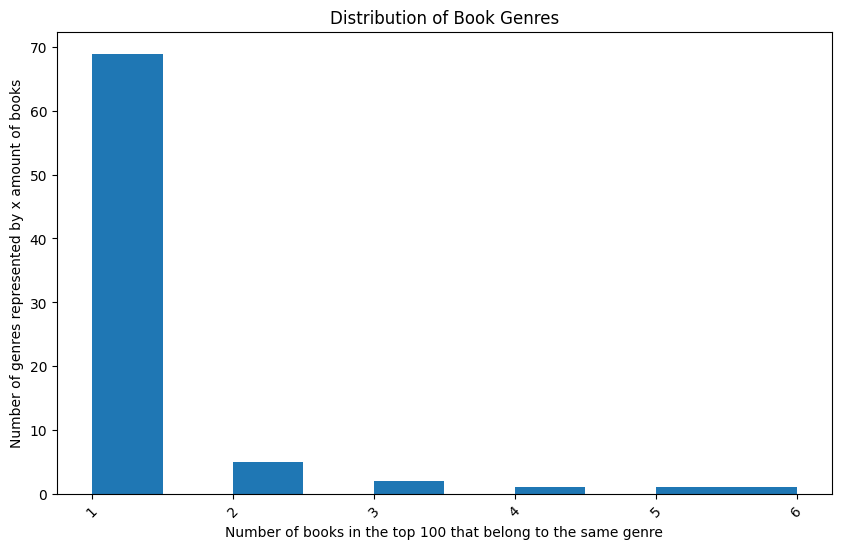

In [26]:
# Assuming 'genre' is your target variable
genre_counts = df['genre'].value_counts()

# Plot the distribution of genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='hist')
plt.title('Distribution of Book Genres')
plt.xlabel('Number of books in the top 100 that belong to the same genre')
plt.ylabel('Number of genres represented by x amount of books')
plt.xticks(rotation=45)
plt.show()

In [27]:
genre_counts

genre
Nonfiction                                                                               6
Childrens, literature                                                                    5
Childrens                                                                                4
Memoir                                                                                   3
Fantasy                                                                                  3
Fantasy, Dragons, Young Adult, Fiction, High Fantasy, Magic, Science Fiction, Fantasy    2
Fiction                                                                                  2
Historical Fiction                                                                       2
Childrens, Storytime,Fiction                                                             2
Dark, Thriller, Fantasy, Adult, Contemporary, Mystery, Horror                            2
Fantasy, Romance, Young Adult, New Adult, Fiction                                   

In [28]:
# Extract relevant columns
relevant_columns = ['book title', 'rating', 'genre']

# Filter the dataset to include only the relevant columns
filtered_data = df[relevant_columns]

# Function to decode a specific book's hidden message
def decode_book(book_title): 
    # Dummy implementation: Return the book title reversed
    decoded_message = book_title[::-1]
    
    # Return the decoded message
    return decoded_message

# Iterate over each book in the dataset
for index, row in filtered_data.iterrows():
    book_title = row['book title']
    rating = row['rating']
    genre = row['genre']

    # Decode the hidden message within the book
    decoded_message = decode_book(book_title)
    # Print the book's details and the decoded message
    print(f"Book Title: {book_title}")
    print(f"Rating: {rating}")
    print(f"Genre: {genre}")
    print(f"Decoded Message: {decoded_message}")
    print("-------------------------------------")

Book Title: Iron Flame (The Empyrean, 2)
Rating: 4.1
Genre: Fantasy Romance
Decoded Message: )2 ,naerypmE ehT( emalF norI
-------------------------------------
Book Title: The Woman in Me
Rating: 4.5
Genre: Memoir
Decoded Message: eM ni namoW ehT
-------------------------------------
Book Title: My Name Is Barbra
Rating: 4.5
Genre: Autobiography
Decoded Message: arbraB sI emaN yM
-------------------------------------
Book Title: Friends, Lovers, and the Big Terrible Thing: A Memoir
Rating: 4.4
Genre: Memoir
Decoded Message: riomeM A :gnihT elbirreT giB eht dna ,srevoL ,sdneirF
-------------------------------------
Book Title: How to Catch a Turkey
Rating: 4.8
Genre: Childrens, Fiction
Decoded Message: yekruT a hctaC ot woH
-------------------------------------
Book Title: Fourth Wing (The Empyrean, 1)
Rating: 4.8
Genre: Fantasy
Decoded Message: )1 ,naerypmE ehT( gniW htruoF
-------------------------------------
Book Title: Unwoke: How to Defeat Cultural Marxism in America
Rating: 4.3
G

In [29]:
df1['book name'].value_counts().head()

book name
The Ballad of Songbirds and Snakes (A Hunger Games Novel) (The Hunger Games)    20
My First Library : Boxset of 10 Board Books for Kids (My First Book of)         10
The Creative Act: A Way of Being                                                10
A Court of Mist and Fury (A Court of Thorns and Roses, 2)                       10
Verity                                                                          10
Name: count, dtype: int64

In [30]:
df1['reviewer'].value_counts().head()

reviewer
Amazon Customer    40
Kindle Customer    13
Michelle            4
Anne Pruitt         3
Ashley              3
Name: count, dtype: int64

In [31]:
df1['reviewer'].unique().size

819

Da qui si vede che lo stesso reviewer ha fatto la review di uno o più libri.

In [32]:
df1['is_verified'].value_counts()

is_verified
True     917
False      3
Name: count, dtype: int64

In [33]:
unverified_books=df1[df1['is_verified']==False]
unverified_books_names=unverified_books['book name'].unique()
print("Name of unverified books:")
for book_name in unverified_books_names:
    print(book_name)

Name of unverified books:
Hidden Potential: The Science of Achieving Greater Things


In [34]:
# Get the value counts of the 'is_verified' column
verification_counts = df1['is_verified'].value_counts()

# Create a pie chart
fig = px.pie(verification_counts, values=verification_counts.values, names=verification_counts.index)

# Update layout
fig.update_layout(title='Verification Status Distribution')

# Show the plot
fig.show()

In [35]:
df1['date'].describe()

count            920
unique           243
top       02-11-2023
freq              38
Name: date, dtype: object

Questo codice esegue diverse operazioni su un DataFrame `df1` che contiene informazioni sui libri, tra cui la data di pubblicazione, se un libro è verificato o meno e altre informazioni.

1. **Conversione della colonna 'date' in tipo datetime**:
   - Utilizza `pd.to_datetime()` per convertire la colonna 'date' del DataFrame in un tipo datetime. L'argomento `dayfirst=True` specifica che i giorni devono essere interpretati come la prima parte delle date, se presente.
  
2. **Creazione di DataFrame separati per libri verificati e non verificati**:
   - Utilizza la selezione condizionale per creare due nuovi DataFrame, uno per i libri verificati e uno per quelli non verificati. Questo viene fatto filtrando le righe in base al valore della colonna 'is_verified'.

3. **Raggruppamento dei DataFrame per data e conteggio delle occorrenze**:
   - Utilizza il metodo `value_counts()` per contare il numero di occorrenze di ciascuna data all'interno delle colonne 'date' dei DataFrame di libri verificati e non verificati. I risultati sono quindi ordinati per data utilizzando `sort_index()`.

4. **Creazione di un grafico a doppio asse delle linee**:
   - Crea un oggetto figura e un solo asse (`ax1`) utilizzando `plt.subplots()`.
   - Traccia la linea per i libri verificati sull'asse `ax1` utilizzando `plot()`, specificando il colore blu e il marcatore 'o'.
   - Specifica le etichette degli assi x e y per l'asse `ax1` utilizzando `set_xlabel()` e `set_ylabel()`.
   - Crea un secondo asse y (`ax2`) usando `twinx()` per tracciare i conteggi dei libri non verificati.
   - Traccia la linea per i libri non verificati sull'asse `ax2` utilizzando `plot()`, specificando il colore rosso e il marcatore 's'.
   - Specifica l'etichetta dell'asse y per l'asse `ax2` utilizzando `set_ylabel()`.
  
5. **Personalizzazione del grafico**:
   - Assegna un titolo al grafico utilizzando `set_title()`.
   - Abilita la griglia sull'asse `ax1` utilizzando `grid(True)`.
   - Aggiunge legende per le linee dei libri verificati e non verificati utilizzando `legend()`.

6. **Ruota le etichette dell'asse x per una migliore leggibilità**:
   - Utilizza `fig.autofmt_xdate()` per ruotare automaticamente le etichette sull'asse x per una migliore leggibilità.

7. **Mostra il grafico**:
   - Utilizza `plt.show()` per visualizzare il grafico completo.

In sintesi, questo codice crea un grafico a linee che mostra la distribuzione nel tempo dei libri verificati e non verificati in base alla data di pubblicazione.

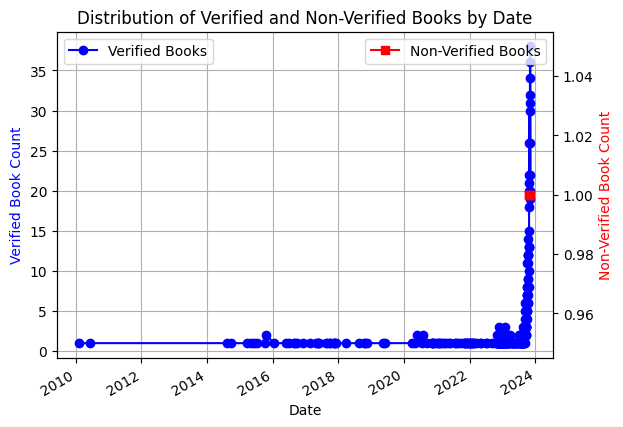

In [36]:
# Convert 'date' column to datetime type
df1['date'] = pd.to_datetime(df1['date'], dayfirst=True)

# Create separate DataFrames for verified and non-verified books
verified_books = df1[df1['is_verified'] == True]
non_verified_books = df1[df1['is_verified'] == False]

# Group the DataFrames by date and count the number of occurrences for each date
# then sort them by date
verified_counts = verified_books['date'].value_counts().sort_index()
non_verified_counts = non_verified_books['date'].value_counts().sort_index()

# Create the dual-axis line chart
fig, ax1 = plt.subplots()

# Plot the line for verified books
ax1.plot(verified_counts.index, verified_counts.values, color='b', marker='o')
ax1.set_xlabel('Date')
ax1.set_ylabel('Verified Book Count', color='b')

# Create a second y-axis for non-verified books
ax2 = ax1.twinx()
ax2.plot(non_verified_counts.index, non_verified_counts.values, color='r', marker='s')
ax2.set_ylabel('Non-Verified Book Count', color='r')

# Customize the plot
ax1.set_title('Distribution of Verified and Non-Verified Books by Date')
ax1.grid(True)
ax1.legend(['Verified Books'], loc='upper left')
ax2.legend(['Non-Verified Books'], loc='upper right')

# Rotate x-axis tick labels for better readability
fig.autofmt_xdate()

# Show the plot
plt.show()

In [37]:
# Get the value counts of timestamps
timestamp_counts = df1['timestamp'].value_counts()
timestamp_counts.head()

timestamp
Reviewed in the United States November 2, 2023    38
Reviewed in the United States November 6, 2023    36
Reviewed in the United States November 3, 2023    34
Reviewed in the United States November 1, 2023    32
Reviewed in the United States October 31, 2023    31
Name: count, dtype: int64

In [38]:


timestamp_counts = df1['timestamp'].value_counts()
timestamp_counts.tail()



timestamp
Reviewed in the United States January 17, 2021     1
Reviewed in the United States December 31, 2022    1
Reviewed in the United States March 6, 2023        1
Reviewed in the United States February 5, 2023     1
Reviewed in the United States May 17, 2019         1
Name: count, dtype: int64

In [39]:
timestamp_counts = df1['timestamp'].unique().size
timestamp_counts

243

In [40]:
# Find the starting and ending timestamps
start_timestamp = df1['timestamp'].min()
end_timestamp = df1['timestamp'].max()

print("Starting timestamp of the book:", start_timestamp)
print("Ending timestamp of the book:", end_timestamp)

Starting timestamp of the book: Reviewed in the United States April 10, 2023
Ending timestamp of the book: Reviewed in the United States September 9, 2023


Controlliamo le percentuali di valori nulli per ogni colonna

In [41]:
df.isnull().sum()/len(df)*100

Rank                   0.0
book title             0.0
book price             0.0
rating                 3.0
author                 0.0
year of publication    0.0
genre                  0.0
url                    0.0
dtype: float64

In [42]:
df1.isnull().sum()/len(df)*100

Sno                   0.0
book name             0.0
review title          0.0
reviewer              0.0
reviewer rating       0.0
review description    0.0
is_verified           0.0
date                  0.0
timestamp             0.0
ASIN                  0.0
dtype: float64

Come si nota, ci sono dei valori mancanti in df, alla colonna rating, quindi si usa il KNN Imputer.

Questo codice utilizza la classe `KNNImputer` fornita dalla libreria scikit-learn (`sklearn`) per imputare i valori mancanti nella colonna 'rating' di un DataFrame `df`.

Ecco cosa fa passo dopo passo:

1. Importa la classe `KNNImputer` dalla libreria `sklearn.impute`.
   
2. Estrae la colonna 'rating' dal DataFrame `df` e la converte in un array NumPy bidimensionale utilizzando il metodo `.values`. Successivamente, viene modificata la forma dell'array in modo che abbia una sola colonna e un numero di righe adattato (-1 indica che il numero di righe deve essere inferito in base alla lunghezza dell'array originale e 1 indica una sola colonna).

3. Istanzia un oggetto `KNNImputer` senza specificare nessun parametro. Ciò utilizza i valori di default per l'imputazione.

4. Applica l'imputazione utilizzando il metodo `fit_transform()` dell'oggetto `KNNImputer`. Questo metodo addestra il modello di imputazione sui dati forniti e quindi applica l'imputazione. In questo caso, l'array bidimensionale `ratings` viene passato al metodo `fit_transform()`, e il risultato viene assegnato nuovamente alla colonna 'rating' del DataFrame `df`.

In sostanza, il codice imputa i valori mancanti nella colonna 'rating' del DataFrame `df` utilizzando il metodo dei k-NN (k-Nearest Neighbors) per imputazione fornito da scikit-learn.

In [43]:
from sklearn.impute import KNNImputer

# Assuming df['rating'] is a pandas Series
ratings = df['rating'].values.reshape(-1, 1)

imputer = KNNImputer()
df['rating'] = imputer.fit_transform(ratings)

Un altro modo per vedere i dati mancanti potrebbe essere crearsi una heatmap con la mappa dei valori NaN. Qui sotto tutti i valori sono a False, ossia abbiamo riempito tutto, ma potrebbe essere utile in futuro per altre situazioni. In ogni caso, è un double check per assicurarsi che non ci siano valori NaN. 

<Axes: >

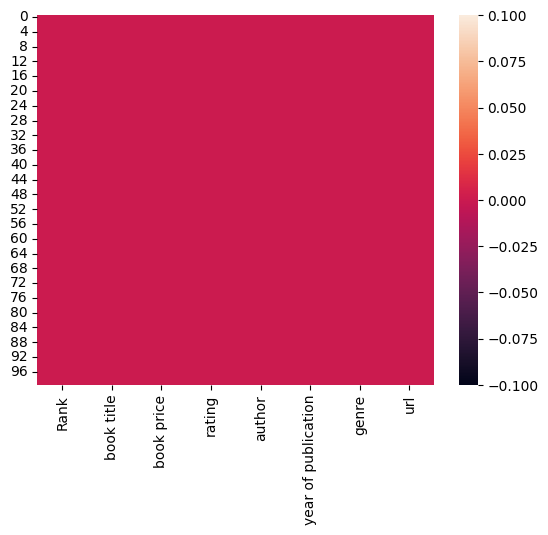

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the boolean mask of missing values
null_values= df.isnull()

# Create the heatmap
sns.heatmap(null_values)

### Data Merging

In [45]:
# Merge the two DataFrames on the common column
merged_df = pd.merge(df, df1, left_on='book title', right_on='book name', how='inner')

# Drop the duplicate column after merging (if needed)
merged_df.drop('book name', axis=1, inplace=True)

# Print the merged DataFrame to verify
merged_df.head()

,Rank,book title,book price,rating,author,year of publication,genre,url,Sno,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,2,The Woman in Me,20.93,4.5,Britney Spears,2023-01-01,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,0,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,I'm only a third way in. Shipped lightening fa...,True,2023-10-26,"Reviewed in the United States October 26, 2023",1668009048
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023-01-01,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,1,What a heartbreaking story,L J,5,"""There have been so many times when I was scar...",True,2023-11-06,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,20.93,4.5,Britney Spears,2023-01-01,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,2,Britney you are so invincible! You are an insp...,Jamie,5,The media could not be loaded. I personally ha...,True,2023-11-01,"Reviewed in the United States November 1, 2023",1668009048
3,2,The Woman in Me,20.93,4.5,Britney Spears,2023-01-01,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,3,"Fast Read, Sad Story",KMG,5,I have been a fan of Britney's music since the...,True,2023-10-25,"Reviewed in the United States October 25, 2023",1668009048
4,2,The Woman in Me,20.93,4.5,Britney Spears,2023-01-01,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,4,"Buy it, it’s worth the read!",Stephanie Brown,5,"Whether or not you’re a fan, it’s a great read...",True,2023-11-01,"Reviewed in the United States November 1, 2023",1668009048


In [46]:
description = merged_df.describe()

# Define a function to highlight specific values
def highlight_values(val):
    if isinstance(val, pd.Timestamp) and val > pd.Timestamp('2023-01-01'):  
        return 'background-color: #3495c9'  
    elif isinstance(val, (int, float)) and val < 10:  
        return 'background-color: #c9a634' 
    else:
        return ''  # No highlight for other values

# Apply the style with the highlighted values
styled_description = description.style.applymap(highlight_values)

# Display the styled DataFrame
styled_description

/tmp/ipykernel_2338217/3341627973.py:13: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Rank,book price,rating,year of publication,Sno,reviewer rating,date
count,890.000000,890.000000,890.000000,890,890.000000,890.000000,890
mean,51.550562,12.009438,4.693258,2013-10-19 00:00:00.000000256,453.825843,4.819101,2023-04-18 06:04:02.696629504
min,2.000000,2.790000,4.100000,1947-01-01 00:00:00,0.000000,2.000000,2010-02-10 00:00:00
25%,26.000000,6.260000,4.600000,2014-01-01 00:00:00,212.250000,5.000000,2023-09-09 00:00:00
50%,51.000000,10.390000,4.700000,2019-01-01 00:00:00,444.500000,5.000000,2023-10-18 00:00:00
75%,77.000000,15.790000,4.800000,2022-01-01 00:00:00,696.750000,5.000000,2023-10-30 00:00:00
max,100.000000,48.770000,4.900000,2024-01-01 00:00:00,919.000000,5.000000,2023-11-06 00:00:00
std,28.900750,7.639715,0.166211,nan,270.409717,0.439699,nan


### Data Cleaning

In [47]:
# converting the whole data to the lower case
merged_df['review description']=merged_df['review description'].str.lower()
merged_df['review description'].head()

0    i'm only a third way in. shipped lightening fa...
1    "there have been so many times when i was scar...
2    the media could not be loaded. i personally ha...
3    i have been a fan of britney's music since the...
4    whether or not you’re a fan, it’s a great read...
Name: review description, dtype: object

In [48]:
# Remove extra white space from review description column
merged_df['review description']=merged_df['review description'].str.strip()
merged_df['review description'].head()

0    i'm only a third way in. shipped lightening fa...
1    "there have been so many times when i was scar...
2    the media could not be loaded. i personally ha...
3    i have been a fan of britney's music since the...
4    whether or not you’re a fan, it’s a great read...
Name: review description, dtype: object

In [49]:
from bs4 import BeautifulSoup
# Remove the HTML tags
def remove_html_tags(review_description):
    soup = BeautifulSoup(review_description, 'html.parser')
    return soup.get_text()
# Remove HTML tags from 'Text' column
merged_df['review description'] = merged_df['review description'].apply(remove_html_tags)
merged_df['review description'].head()

/tmp/ipykernel_2338217/2634570351.py:4: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



0    i'm only a third way in. shipped lightening fa...
1    "there have been so many times when i was scar...
2    the media could not be loaded. i personally ha...
3    i have been a fan of britney's music since the...
4    whether or not you’re a fan, it’s a great read...
Name: review description, dtype: object

In [50]:
import re 
def remove_urls(review_description):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # Replace the urls with empty space 
    return url_pattern.sub(" ", review_description)

# Let's apply the remove_urls function to the review description column
merged_df['review description'] = merged_df['review description'].apply(remove_urls)

In [51]:
import string, time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [52]:
exclude=string.punctuation
def remove_punc(review_description):
    without_punc=review_description.translate(str.maketrans("", "", string.punctuation))
    return without_punc
# Lets apply the Remove punctuation function to the review description column
merged_df['review description'] = merged_df['review description'].apply(remove_punc)
merged_df['review description'].head()

0    im only a third way in shipped lightening fast...
1    there have been so many times when i was scare...
2    the media could not be loaded i personally hav...
3    i have been a fan of britneys music since the ...
4    whether or not you’re a fan it’s a great read ...
Name: review description, dtype: object

### Rimozione caratteri speciali

Caratteri speciali sono quei caratteri che non sono lettere, numeri o spazi vuoti. Questi sono segni di punteggiatura, caratteri non alfanumerici, ecc.
Standardizzazione: Rimuovendo i caratteri speciali possiamo ottenere il testo standardizzato per il compito di elaborazione del linguaggio naturale.
Miglioramento delle prestazioni del modello: Può anche migliorare le prestazioni del modello.
Riduzione del rumore: Riduce il rumore e normalizza il testo per il compito di elaborazione del linguaggio naturale.

In [53]:
def remove_special_characters(text):
    # Define the set of characters to remove
    characters_to_remove = string.punctuation + "’"  # Include apostrophe
    
    # Remove special characters from the text
    without_special_chars = ''.join(char for char in text if char not in characters_to_remove)
    
    return without_special_chars
merged_df['review description'] = merged_df['review description'].apply(remove_special_characters)
merged_df['review description'].head()

0    im only a third way in shipped lightening fast...
1    there have been so many times when i was scare...
2    the media could not be loaded i personally hav...
3    i have been a fan of britneys music since the ...
4    whether or not youre a fan its a great read br...
Name: review description, dtype: object

### Rimozione chatwords

Parole da chat: sono le abbreviazioni informali o espressioni comunemente usate per la comunicazione.
Nel testo possono essere presenti varie parole da chat che causano rumore.
Miglioramento della comprensione: La rimozione delle parole da chat migliora la comprensione dei dati testuali e quindi semplifica l'elaborazione.
Preso contenuto importante: La rimozione delle stopwords aiuta a prendere solo il contenuto importante dei dati.

In [54]:
chat_words={"BRB" : "Be right back",
"BTW": "By the way",
"OMG": "Oh my God/goodness",
"TTYL": "Talk to you later",
"OMW" : "On my way",
"SMH/SMDH" : "Shaking my head/shaking my darn head",
"LOL" : "Laugh out loud",
"TBD" : "To be determined",
"IMHO/IMO" : "In my humble opinion",
"HMU" : "Hit me up",
"IIRC" : "If I remember correctly",
"LMK" : "Let me know",
"OG" : "Original gangsters (used for old friends)",
"FTW" : "For the win",
"NVM" : "Nevermind",
"OOTD" : "Outfit of the day",
"Ngl" : "Not gonna lie",
"Rq" : "real quick",
"Iykyk" : "If you know, you know",
"Ong" : "On god (I swear)",
"YAAAS" : "Yes!",
"Brt" : "Be right there",
"Sm" : "So much",
"Ig" : "I guess",
"Wya" : "Where you at",
"Istg" : "I swear to god",
"Hbu" : "How about you",
"Atm" : "At the moment",
"Asap" : "As soon as possible",
"Fyi" : "For your information"}

In [55]:
def handle_chat_words(review_description):
    # Split the review description into individual words
    words = review_description.split()
    
    # Iterate over each word and replace chat words if found in the dictionary
    for i in range(len(words)):
        if words[i] in chat_words:
            words[i] = chat_words[words[i]]
    
    # Join the modified words back into a single string
    modified_description = ' '.join(words)
    
    return modified_description

# Let's apply the handle_chat_words function to the review description column
merged_df['review description'] = merged_df['review description'].apply(handle_chat_words)

### Rimozione Emoticon

Emoticon: sono i simboli o le icone digitali utilizzate per esprimere le emozioni.
Riduzione del rumore: Le emoticon, se presenti, possono causare rumore e occupare più spazio, rendendo il testo più lungo. È quindi necessario rimuovere le emoticon dal testo.

In [56]:
def remove_emojis(review_description):
    # Define the pattern to match Unicode emojis
    emoji_pattern = re.compile(r'[\U0001F000-\U0001F9FF]|[\U0001F300-\U0001F5FF]|[\U0001F600-\U0001F64F]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF]|[\U00002702-\U000027B0]|[\U000024C2-\U0001F251]|[\U0001f926-\U0001f937]|[\U0001F1E0-\U0001F1FF]')

    # Remove emojis by replacing them with an empty string
    without_emojis = emoji_pattern.sub('', review_description)
    return without_emojis
# Let's apply the handle_chat_words function to the review description column
merged_df['review description'] = merged_df['review description'].apply(remove_emojis)

In [57]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

# Get the list of stop words
stop_words = set(stopwords.words('english'))

def remove_stop_words(review_description):
    # Tokenize the review description
    words = review_description.split()
    
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Join the filtered words back into a single string
    filtered_description = ' '.join(filtered_words)
    
    return filtered_description

# Apply the remove_stop_words function to the review description column
merged_df['review description'] = merged_df['review description'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /home/ddosso/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
books_ds=merged_df.copy()
books_ds.head(5)
# the new datasets has 890 rows

,Rank,book title,book price,rating,author,year of publication,genre,url,Sno,review title,reviewer,reviewer rating,review description,is_verified,date,timestamp,ASIN
0,2,The Woman in Me,20.93,4.5,Britney Spears,2023-01-01,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,0,Unbelievably impressive. Her torn life on paper.,Murderess Marbie,4,im third way shipped lightening fastthe print ...,True,2023-10-26,"Reviewed in the United States October 26, 2023",1668009048
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023-01-01,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,1,What a heartbreaking story,L J,5,many times scared speak afraid somebody would ...,True,2023-11-06,"Reviewed in the United States November 6, 2023",1668009048
2,2,The Woman in Me,20.93,4.5,Britney Spears,2023-01-01,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,2,Britney you are so invincible! You are an insp...,Jamie,5,media could loaded personally exact situations...,True,2023-11-01,"Reviewed in the United States November 1, 2023",1668009048
3,2,The Woman in Me,20.93,4.5,Britney Spears,2023-01-01,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,3,"Fast Read, Sad Story",KMG,5,fan britneys music since 00s couple years olde...,True,2023-10-25,"Reviewed in the United States October 25, 2023",1668009048
4,2,The Woman in Me,20.93,4.5,Britney Spears,2023-01-01,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...,4,"Buy it, it’s worth the read!",Stephanie Brown,5,whether youre fan great read britney takes wor...,True,2023-11-01,"Reviewed in the United States November 1, 2023",1668009048


In [59]:
books_ds['review description'][6]

'world access britney spears memoir one week bookstagram flooded opinions reviews since latest kayce 5 star tell leave full reviewive britney fan since day one seen relentless paparazzi coverage 20 years everyone opinion britney judge think know everything based theyve seen magazines online finally speaking memoir tells us stories think knew perspectivewhile memes reels justin pretty funny since came britney went traumatic experience know one girl held twenty years wouldnt thats incredibly personal decision media villainized praised really dont care justin thinks britneys revelations made choices shes making choices never victimize simply tells us felt ups downs personally professionallyyou get fun stories favorite album favorite performances celebs admires britney admits good fame girl know none us would either britney never gets another stage rest life wouldnt blame one second given healing music wouldnt surprised got music one day terms bet best shes ever releasedsince woman 275 pag

In [60]:
ps = PorterStemmer()
corpus = []

for i in range(0, len(books_ds)):
    review = re.sub('[^a-zA-Z]', ' ', books_ds['review description'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
    review = ' '.join(review)
    corpus.append(review)


Tfidf sta per Term frequency Inverse document frequency.
Tfidf è una tecnica di elaborazione del linguaggio naturale (NLP) utilizzata per valutare l'importanza delle diverse parole in una frase.
TfidfVectorizer è una formula statistica utilizzata per convertire i documenti di testo in vettori basati sulle parole rilevanti.
è una misura dell'importanza di una parola per un documento in una collezione o corpus.
Si basa sul modello bag of the words per creare una matrice contenente le informazioni sulle parole meno rilevanti e più rilevanti nel documento.

In [61]:
# Features (X)
X_text = books_ds['book title'] + ' ' + books_ds['review title'] + ' ' + books_ds['review description']

# Target (y)
y = books_ds['Rank']

In [62]:
tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = tfidf_vec.fit_transform(X_text).toarray()

In [63]:
# We have 890 rows, one for each document. 5000 features for document. as requested, created using n-grams with n ranging from 1 to 3.
X.shape

(890, 5000)

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [65]:
# as we can see, it is possible from the vectorizer to go back to having the text features (n-grams with n going from 1 to 3 in this case)
feature_names = tfidf_vec.get_feature_names_out()
print(feature_names[:30])  # Printing the first 10 feature names

['10' '10 board' '10 board books' '10 pictures' '10 pictures one' '100'
 '100 recipes' '100 recipes that' '1010' '11' '12' '12 books'
 '12 books in' '13' '14' '15' '15 years' '16' '18' '18th' '1944' '1st'
 '20' '2006' '2018' '2023' '25' '2nd' '2nd edition' '2nd edition guide']


In [66]:
tfidf_vec.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [67]:
# we print a dataframe were each column is a feature composing each vector, and we see how numbers were decided by the algorithm tf-idf
count_df=pd.DataFrame(X_train, columns=tfidf_vec.get_feature_names_out())
count_df.head()

10  10 board  10 board books  10 pictures  10 pictures one  100  \
0  0.0       0.0             0.0          0.0              0.0  0.0   
1  0.0       0.0             0.0          0.0              0.0  0.0   
2  0.0       0.0             0.0          0.0              0.0  0.0   
3  0.0       0.0             0.0          0.0              0.0  0.0   
4  0.0       0.0             0.0          0.0              0.0  0.0   

   100 recipes  100 recipes that  1010   11   12  12 books  12 books in   13  \
0          0.0               0.0   0.0  0.0  0.0       0.0          0.0  0.0   
1          0.0               0.0   0.0  0.0  0.0       0.0          0.0  0.0   
2          0.0               0.0   0.0  0.0  0.0       0.0          0.0  0.0   
3          0.0               0.0   0.0  0.0  0.0       0.0          0.0  0.0   
4          0.0               0.0   0.0  0.0  0.0       0.0          0.0  0.0   

         14   15  15 years   16   18  18th  1944  1st   20  2006  2018  2023  \
0  0.000000  0.0       0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0   
1  0.000000  0.0       0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0   
2  0.174022  0.0       0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0   
3  0.000000  0.0       0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0   
4  0.000000  0.0       0.0  0.0  0.0   0.0   0.0  0.0  0.0   0.0   0.0   0.0   

    25  2nd  2nd edition  2nd edition guide   30  30 button  30 button animal  \
0  0.0  0.0          0.0                0.0  0.0        0.0               0.0   
1  0.0  0.0          0.0                0.0  0.0        0.0               0.0   
2  0.0  0.0          0.0                0.0  0.0        0.0               0.0   
3  0.0  0.0          0.0                0.0  0.0        0.0               0.0   
4  0.0  0.0          0.0                0.0  0.0        0.0               0.0   

   30 stephanie  30 stephanie plum  300   31  31 ways  31 ways to   35  3rd  \
0           0.0                0.0  0.0  0.0      0.0         0.0  0.0  0.0   
1           0.0                0.0  0.0  0.0      0.0         0.0  0.0  0.0   
2           0.0                0.0  0.0  0.0      0.0         0.0  0.0  0.0   
3           0.0                0.0  0.0  0.0      0.0         0.0  0.0  0.0   
4           0.0                0.0  0.0  0.0      0.0         0.0  0.0  0.0   

    40   45   48  48 laws  48 laws of  48 laws power  4th   50   68   80  \
0  0.0  0.0  0.0      0.0         0.0            0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0      0.0         0.0            0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0      0.0         0.0            0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0      0.0         0.0            0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0      0.0         0.0            0.0  0.0  0.0  0.0  0.0   

   abandoned  abilities  ability  able  able get  about  about money  \
0        0.0        0.0      0.0   0.0       0.0    0.0          0.0   
1        0.0        0.0      0.0   0.0       0.0    0.0          0.0   
2        0.0        0.0      0.0   0.0       0.0    0.0          0.0   
3        0.0        0.0      0.0   0.0       0.0    0.0          0.0   
4        0.0        0.0      0.0   0.0       0.0    0.0          0.0   

   about money that  about my  about my belongings  absence  absolute  \
0               0.0       0.0                  0.0      0.0       0.0   
1               0.0       0.0                  0.0      0.0       0.0   
2               0.0       0.0                  0.0      0.0       0.0   
3               0.0       0.0                  0.0      0.0       0.0   
4               0.0       0.0                  0.0      0.0       0.0   

   absolutely  absolutely love  absolutely loved  abuse  abused  abusive  \
0    0.000000              0.0               0.0    0.0     0.0      0.0   
1    0.000000              0.0               0.0    0.0     0.0      0.0   
2    0.000000              0.0               0.0    0.0     0.0      0.0   
3    0.203772       


### Classificazione tramite modello Random Forest

- **SMOTE**: SMOTE è una tecnica di sovracampionamento in cui vengono generati campioni sintetici per la classe minoritaria. Questo algoritmo aiuta a superare il problema dell'overfitting causato dal sovracampionamento casuale.
- **Gestisce lo sbilanciamento delle classi**: SMOTE gestisce lo sbilanciamento delle classi in questo modo:
  - **Generazione di dati sintetici**: La tecnica SMOTE gestisce lo sbilanciamento delle classi generando **dati sintetici** per la classe minoritaria. Unisce tutti i k vicini di classe minoritaria più vicini creando istanze sintetiche.
  - **Distribuzione bilanciata delle classi**: Generando campioni sintetici per la classe minoritaria, SMOTE aiuta a bilanciare la distribuzione delle classi, riducendo così il bias.
- **Riduce l'overfitting**: Riduce l'overfitting.

---

Questo codice effettua i seguenti passaggi:

1. **Split dei dati**: Suddivide i dati in set di addestramento e di test utilizzando la funzione `train_test_split()`. `X_text` rappresenta le feature del testo e `y` rappresenta le etichette di classe. Il 20% dei dati viene assegnato al set di test, mentre l'80% viene utilizzato per l'addestramento del modello. Il parametro `random_state=42` garantisce che lo split dei dati sia riproducibile.

2. **Definizione del vettorizzatore TF-IDF**: Viene definito un vettorizzatore TF-IDF (`tfidf_vec`) con un massimo di 5000 feature e un range di n-grammi da unigrammi a trigrammi.

3. **Calcolo del numero di vicini per SMOTE**: Viene calcolato il numero di vicini da utilizzare per la tecnica di oversampling SMOTE. Questo valore viene impostato come il minimo numero di campioni nella classe di minoranza meno uno, a meno che il numero minimo di campioni non sia inferiore a 1.

4. **Definizione della pipeline**: Viene definita una pipeline (`pipeline`) che comprende i seguenti passaggi:
   - TF-IDF vectorization (`'tfidf'`)
   - Oversampling tramite SMOTE (`'sampling'`)
   - Undersampling casuale (`'undersample'`)
   - Standardizzazione (`'scaling'`)
   - Classificatore RandomForest (`'classifier'`)

5. **Addestramento del modello**: Il modello viene addestrato utilizzando i dati di addestramento (`X_train`, `y_train`) tramite il metodo `fit()` della pipeline.

6. **Predizione sui dati di test**: Vengono effettuate predizioni utilizzando i dati di test (`X_test`) tramite il metodo `predict()` della pipeline.

7. **Calcolo dell'accuratezza**: Viene calcolata l'accuratezza delle predizioni utilizzando la funzione `accuracy_score()` fornendo le etichette di test reali (`y_test`) e le predizioni (`y_pred`).

8. **Generazione della matrice di confusione**: Viene generata e stampata la matrice di confusione utilizzando la funzione `confusion_matrix()` fornendo le etichette di test reali (`y_test`) e le predizioni (`y_pred`).

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Define the TF-IDF vectorizer
tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

# Calculate the number of neighbors for SMOTE
class_counts = y_train.value_counts()
n_neighbors = min(class_counts) - 1 if min(class_counts) > 1 else 1

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('tfidf', tfidf_vec),
    ('sampling', SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors)),
    ('undersample', RandomUnderSampler()),
    ('scaling', StandardScaler(with_mean=False)),
    ('classifier', RandomForestClassifier())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9550561797752809
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [69]:
# Usiamo qui la Logistic Regression come algoritmo di classificazione

# TF-IDF vectorization
tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = tfidf_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),  # Adjust parameters here if needed
    ('undersample', RandomUnderSampler(random_state=42)),  # Adjust parameters here if needed
    ('scaling', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression())  # Initialize the Multinomial Naive Bayes classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm1)

Accuracy: 0.9382022471910112
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [70]:
# TF-IDF vectorization
tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = tfidf_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),  # Adjust parameters here if needed
    ('undersample', RandomUnderSampler(random_state=42)),  # Adjust parameters here if needed
    ('scaling', StandardScaler(with_mean=False)),
    ('classifier', MultinomialNB())  # Initialize the Multinomial Naive Bayes classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# Calculate confusion matrix
cm2 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm2)

Accuracy: 0.8932584269662921
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [71]:
# Features (X)
X_text = books_ds['book title'] + ' ' + books_ds['review title'] + ' ' + books_ds['review description']

# Target (y)
y = books_ds['Rank']

# TF-IDF vectorization
tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = tfidf_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),  # Adjust parameters here if needed
    ('undersample', RandomUnderSampler(random_state=42)),  # Adjust parameters here if needed
    ('classifier', SVC(random_state=42))  # Initialize the Multinomial Naive Bayes classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm3)

Accuracy: 0.9101123595505618
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [72]:
# Features (X)
X_text = books_ds['book title'] + ' ' + books_ds['review title'] + ' ' + books_ds['review description']

# Target (y)
y = books_ds['Rank']

# TF-IDF vectorization
tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = tfidf_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),  # Adjust parameters here if needed
    ('undersample', RandomUnderSampler(random_state=42)),  # Adjust parameters here if needed
    ('classifier', PassiveAggressiveClassifier(random_state=42))  # Initialize the Multinomial Naive Bayes classifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm3 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm3)



Accuracy: 0.9550561797752809
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [73]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# TF-IDF vectorization
tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = tfidf_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),  # Adjust parameters here if needed
    ('undersample', RandomUnderSampler(random_state=42)),  # Adjust parameters here if needed
    ('classifier', GradientBoostingClassifier(random_state=42))  # Initialize the GradientBoostingClassifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm4 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm4)

In [ ]:
# KNeighborsClassifier

# TF-IDF vectorization
tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = tfidf_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),  # Adjust parameters here if needed
    ('undersample', RandomUnderSampler(random_state=42)),  # Adjust parameters here if needed
    ('classifier', KNeighborsClassifier())  # Initialize the GradientBoostingClassifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm5 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm5)


In [ ]:
# TF-IDF vectorization
tfidf_vec = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X = tfidf_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),  # Adjust parameters here if needed
    ('undersample', RandomUnderSampler(random_state=42)),  # Adjust parameters here if needed
    ('classifier', MLPClassifier(random_state=42))  # Initialize the GradientBoostingClassifier
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm6 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm6)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Define the pipeline with CountVectorizer, SMOTE, RandomUnderSampler, and GradientBoostingClassifier
pipeline_count = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000, ngram_range=(1, 3))),
    ('sampling', SMOTE(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline_count.fit(X_train, y_train)

# Predicting the class labels for the test dataset using CountVectorizer
y_pred_count = pipeline_count.predict(X_test)

# Calculate accuracy for CountVectorizer
accuracy_count = accuracy_score(y_test, y_pred_count)
print("Accuracy with CountVectorizer:", accuracy_count)
# Calculate confusion matrix
cm7 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm7)

In [ ]:
class SMOTETransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.smote = SMOTE(**kwargs)
    
    def fit(self, X, y):
        self.smote.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

class RandomUnderSamplerTransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.undersampler = RandomUnderSampler(**kwargs)
    
    def fit(self, X, y):
        self.undersampler.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

# Count vectorization
count_vec = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = count_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTETransformer(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),
    ('undersample', RandomUnderSamplerTransformer(random_state=42)),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm8 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm8)

In [ ]:
lass SMOTETransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.smote = SMOTE(**kwargs)
    
    def fit(self, X, y):
        self.smote.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

class RandomUnderSamplerTransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.undersampler = RandomUnderSampler(**kwargs)
    
    def fit(self, X, y):
        self.undersampler.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

# Count vectorization
count_vec = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = count_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTETransformer(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),
    ('undersample', RandomUnderSamplerTransformer(random_state=42)),
    ('classifier', MultinomialNB())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm9 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm9)


In [ ]:
class SMOTETransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.smote = SMOTE(**kwargs)
    
    def fit(self, X, y):
        self.smote.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

class RandomUnderSamplerTransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.undersampler = RandomUnderSampler(**kwargs)
    
    def fit(self, X, y):
        self.undersampler.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

# Count vectorization
count_vec = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = count_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTETransformer(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),
    ('undersample', RandomUnderSamplerTransformer(random_state=42)),
    ('classifier', SVC(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm10 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm10)

In [ ]:
class SMOTETransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.smote = SMOTE(**kwargs)
    
    def fit(self, X, y):
        self.smote.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

class RandomUnderSamplerTransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.undersampler = RandomUnderSampler(**kwargs)
    
    def fit(self, X, y):
        self.undersampler.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

# Count vectorization
count_vec = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = count_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTETransformer(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),
    ('undersample', RandomUnderSamplerTransformer(random_state=42)),
    ('classifier', PassiveAggressiveClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm10 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm10)

In [ ]:
class SMOTETransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.smote = SMOTE(**kwargs)
    
    def fit(self, X, y):
        self.smote.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

class RandomUnderSamplerTransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.undersampler = RandomUnderSampler(**kwargs)
    
    def fit(self, X, y):
        self.undersampler.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

# Count vectorization
count_vec = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = count_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTETransformer(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),
    ('undersample', RandomUnderSamplerTransformer(random_state=42)),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm12 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm12)

In [ ]:
class SMOTETransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.smote = SMOTE(**kwargs)
    
    def fit(self, X, y):
        self.smote.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

class RandomUnderSamplerTransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.undersampler = RandomUnderSampler(**kwargs)
    
    def fit(self, X, y):
        self.undersampler.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

# Count vectorization
count_vec = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = count_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTETransformer(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),
    ('undersample', RandomUnderSamplerTransformer(random_state=42)),
    ('classifier', KNeighborsClassifier())
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm13 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm13)

In [ ]:
class SMOTETransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.smote = SMOTE(**kwargs)
    
    def fit(self, X, y):
        self.smote.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

class RandomUnderSamplerTransformer(TransformerMixin):
    def __init__(self, **kwargs):
        self.undersampler = RandomUnderSampler(**kwargs)
    
    def fit(self, X, y):
        self.undersampler.fit_resample(X, y)
        return self
    
    def transform(self, X):
        return X

# Count vectorization
count_vec = CountVectorizer(max_features=5000, ngram_range=(1, 3))
X = count_vec.fit_transform(X_text)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with SMOTE and RandomUnderSampler
pipeline = Pipeline([
    ('sampling', SMOTETransformer(sampling_strategy='auto', k_neighbors=n_neighbors, random_state=42)),
    ('undersample', RandomUnderSamplerTransformer(random_state=42)),
    ('classifier', MLPClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predicting the class labels for the test dataset
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
cm14 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm14)